# Word Count and Word Cloud

Here we examine the words in 'Reason for dishing'. First, all text is joined, then stopwords are removed, then a word count is generated, and a word cloud is produced.

In [107]:
import pandas as pd

df = pd.read_csv('cleaned-non-quantifier-data.csv')

df

,To,From,Reason for dishing,Server,Date,Room,v1 norm,v2 norm,v3 norm,Avg %,...,v3,period,Cred per Praise,Cred per person,To.1,Room-NoEmoji,Source,Year,Month,Day
0,zeptimusQ,Tam2140,for hosting this kicking params party!,Token Engineering Commons,2021-05-07,🙏praise,10000.0,100.0,200.0,0.001963,...,Edu,#17 May 7,NaN,NaN,NaN,praise,Token Engineering Commons:praise,2021,5,7
1,zeptimusQ,iviangita,for hosting and leading a lot of params parties,Token Engineering Commons,2021-05-07,🙏praise,10000.0,100.0,100.0,0.001663,...,Edu,#17 May 7,NaN,NaN,NaN,praise,Token Engineering Commons:praise,2021,5,7
2,zeptimusQ,JuankBell,for testing and deploying the bot to record an...,Token Engineering Commons,2021-04-28,🙏praise,1000.0,200.0,200.0,0.001342,...,Edu,#17 May 7,NaN,NaN,NaN,praise,Token Engineering Commons:praise,2021,4,28
3,zeptimusQ,iviangita,for the huge success of the MVV process,Token Engineering Commons,2021-04-30,🙏praise,1000.0,200.0,100.0,0.001043,...,Edu,#17 May 7,NaN,NaN,NaN,praise,Token Engineering Commons:praise,2021,4,30
4,zeptimusQ,iviangita,"for his awesome work on the recorder bot, for ...",Token Engineering Commons,2021-04-30,🙏praise,1000.0,200.0,100.0,0.001043,...,Edu,#17 May 7,NaN,NaN,NaN,praise,Token Engineering Commons:praise,2021,4,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7620,atacas,liviade,their presence and great contributions to the ...,Telegram,2020-12-01,TE Praise,30.0,60.0,40.0,0.001534,...,Santi,#6 Dec 4,1.201248,0.969588,NaN,TE Praise,Telegram:TE Praise,2020,12,1
7621,Luukweber,iviangita,participating in the Praisegiving Call 😀,Telegram,2020-11-28,TE Praise,40.0,30.0,30.0,0.001180,...,Santi,#6 Dec 4,0.924158,0.924158,NaN,TE Praise,Telegram:TE Praise,2020,11,28
7622,krrisis,GriffGreen,sharing the gitcoin blog post... lots of great...,Telegram,2020-12-02,Commons Stack,10.0,40.0,40.0,0.001103,...,Santi,#6 Dec 4,0.863962,0.863962,NaN,Commons Stack,Telegram:Commons Stack,2020,12,2
7623,sbilbao,JessicaZartler,joining the TE Praise channel and the TEC lab ...,Telegram,2020-11-27,TE Praise,50.0,30.0,10.0,0.001005,...,Santi,#6 Dec 4,0.786973,0.786973,NaN,TE Praise,Telegram:TE Praise,2020,11,27


In [5]:
df['Reason for dishing'].head(20)

0               for hosting this kicking params party! 
1      for hosting and leading a lot of params parties 
2     for testing and deploying the bot to record an...
3              for the huge success of the MVV process 
4     for his awesome work on the recorder bot, for ...
5     for taking care of Ivy's access to Twitter DMs!! 
6     and the many other community members that did ...
7     for keeping the Stewards, and all Working Grou...
8                           for all the awesome MEMES! 
9     for attending the 1Hive TEC Hatch Params Party...
10    for being thoughtful and taking the time to gu...
11    for being present in the Transparency sync cal...
12    for an improv hack session on designs and illu...
13    for joining the <#810180622634844202> bi-weekl...
14    for a highly productive Community Stewards cal...
15             for their amazing ideas in transparency 
16    for all the things they are doing that Suga do...
17    for being an active piece of SoftGov and m

### Wordcount

First, we join all words into a string.

In [104]:
all_praise = ' '.join(df['Reason for dishing'])

In [106]:
with open("all_praise.txt", "w") as text_file:
    text_file.write(all_praise)

In [80]:
praise_words = all_praise.split(' ')

Frequency distribution using nltk

In [81]:
import nltk

nltk.FreqDist(praise_words)

FreqDist({'the': 10119, 'for': 5512, 'and': 4267, 'to': 2513, 'Commons': 2460, 'on': 2253, 'in': 1729, 'joining': 1517, 'you': 1417, '': 1414, ...})

Removing stopwords

In [94]:
# !pip install nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
filtered_words = [word for word in praise_words if word not in stopwords.words('english')]
filtered_words = [word for word in filtered_words if word != '']
filtered_words = [word for word in filtered_words if word != '-']

Wordcount

In [95]:
wordcount = nltk.FreqDist(filtered_words)
wordcount_df = pd.DataFrame(wordcount, index=['count']).T.sort_values('count', ascending=False)

In [103]:
wordcount_df.to_csv('wordcount.csv')

In [97]:
# !pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud(width = 600, height = 400, random_state=1, background_color='#0B0A15', colormap='YlGn', collocations=False).generate(' '.join(filtered_words))

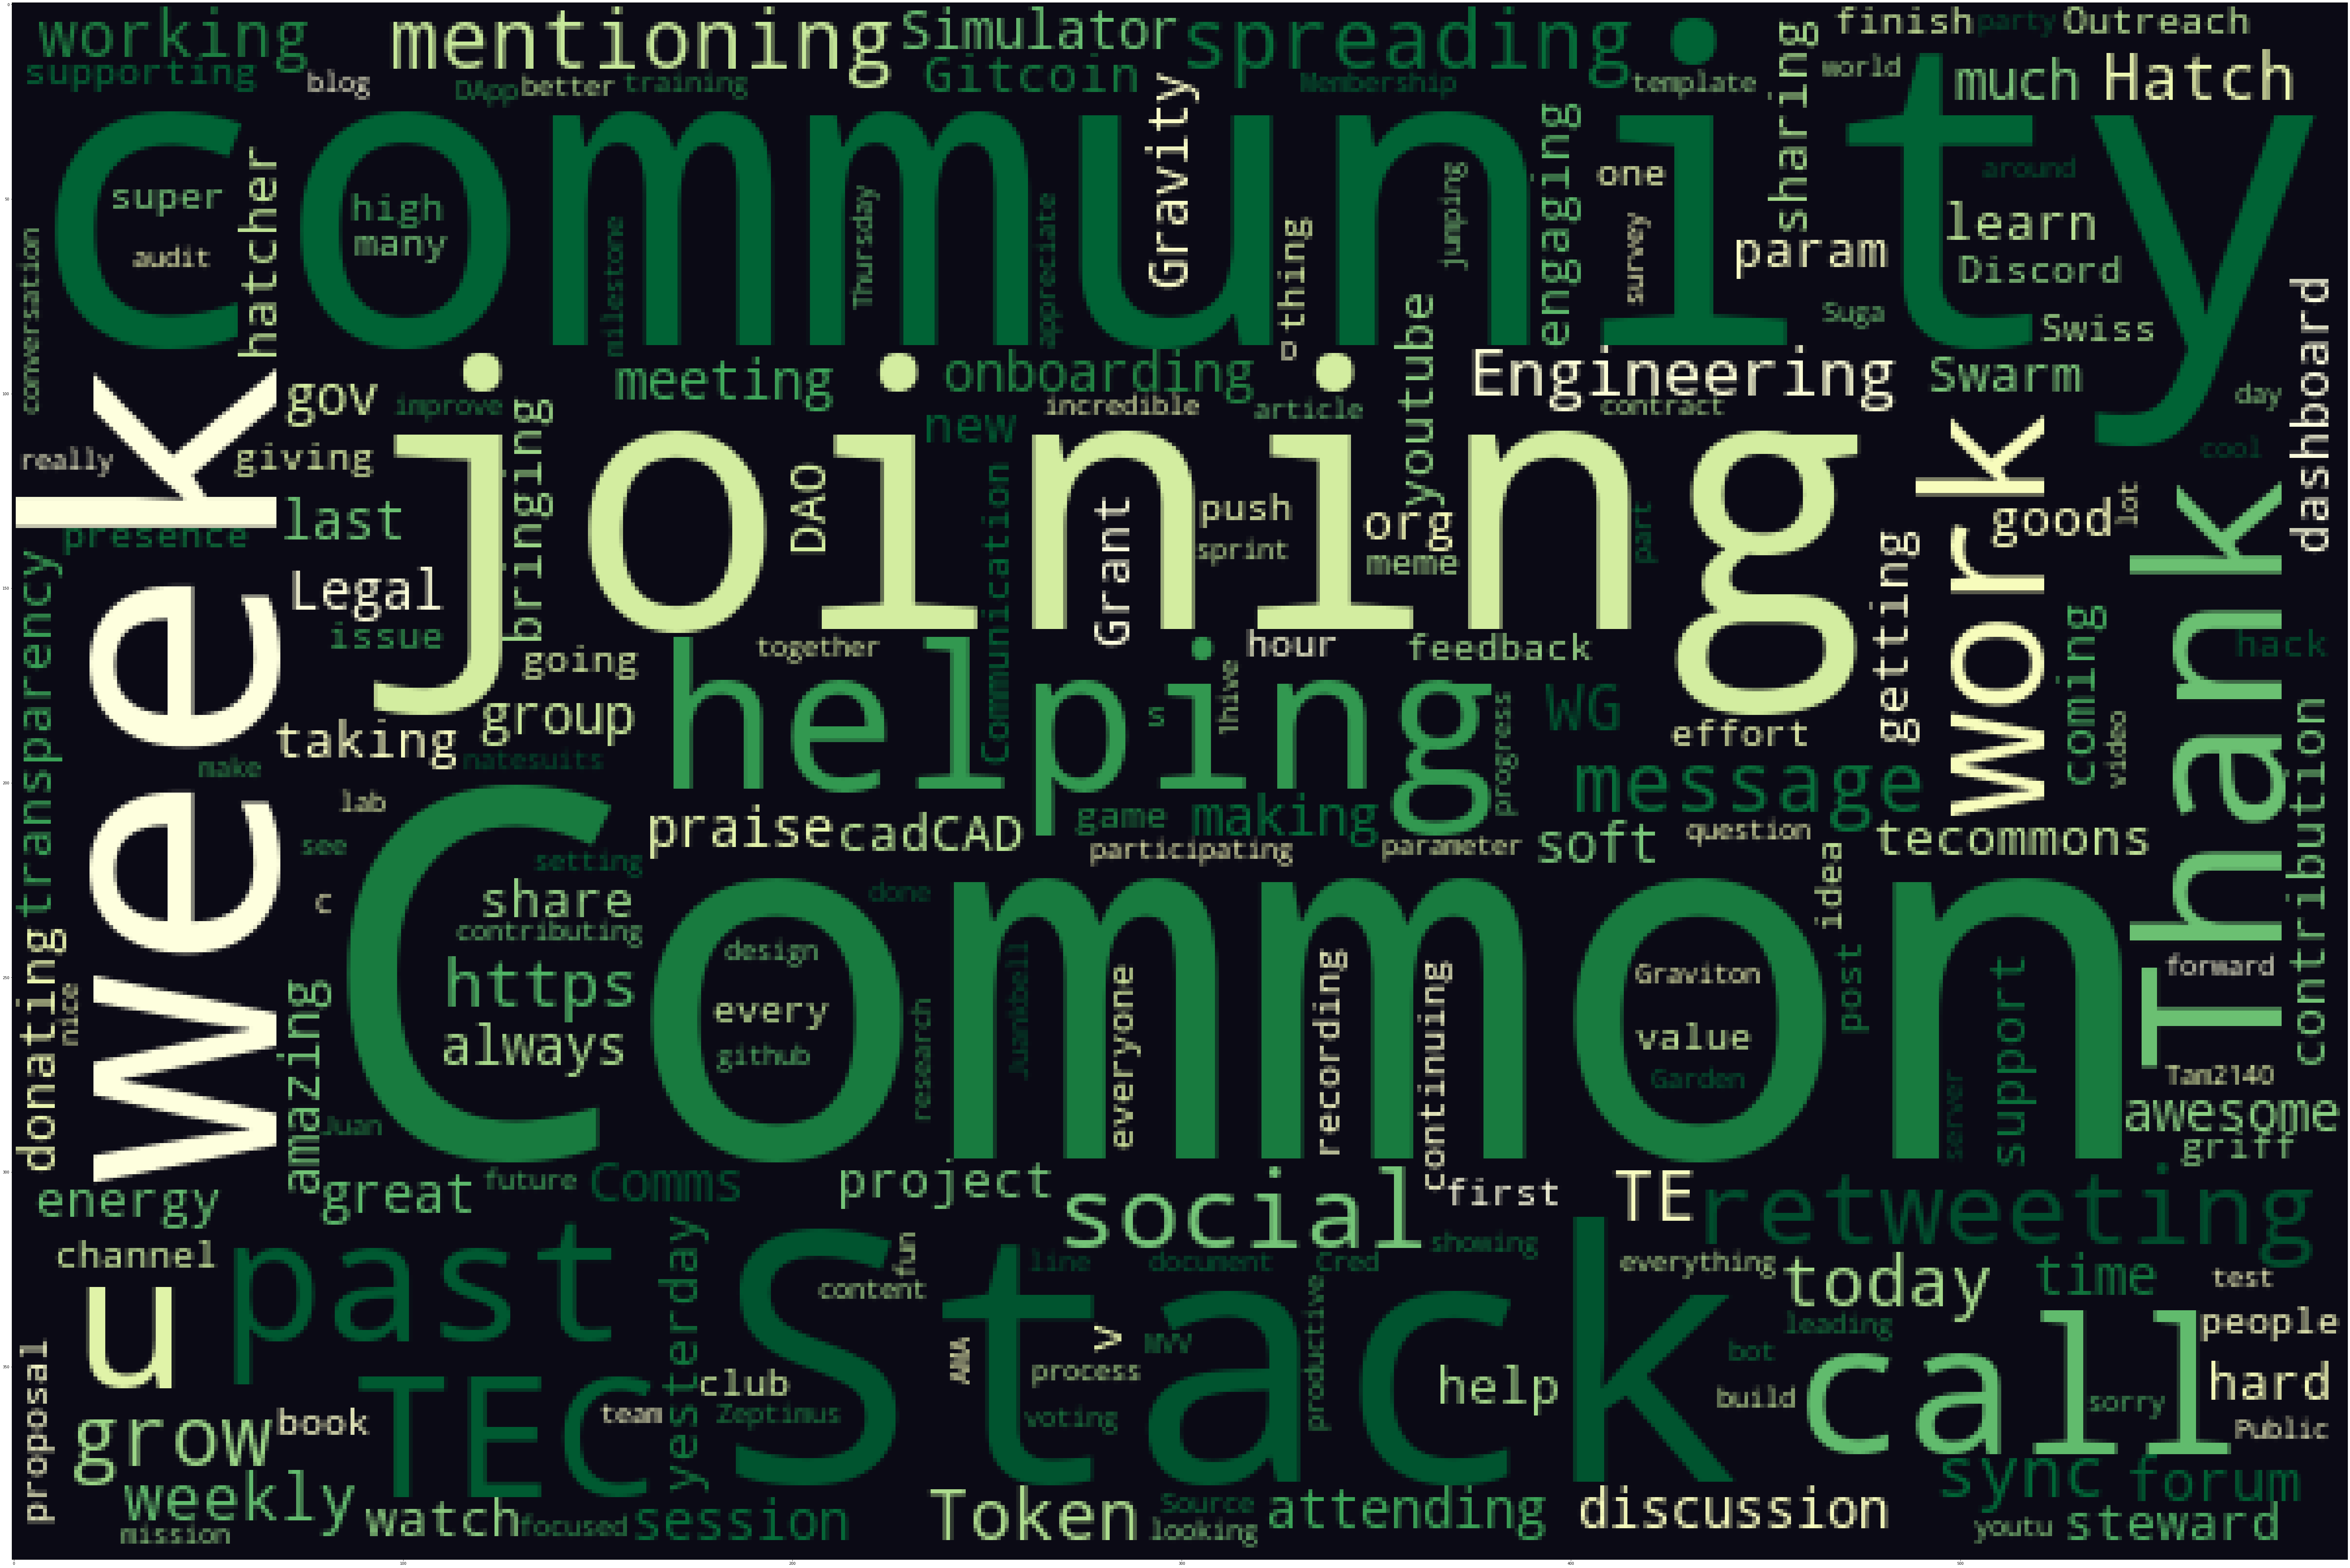

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(120, 80))
plt.imshow(wordcloud) 

In [101]:
plt.imsave('wordcloud.png',wordcloud)